# KNN Model Exercise

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# For feature selection
from sklearn.feature_selection import RFE


import prepare

**Get dataset**

In [2]:
# use the titanic data feom prepare file
titanic = prepare.prep_titanic()

# create base line column
titanic["baseline"] = [int(titanic.survived.mode()) for i in range(len(titanic))]

titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline
0,0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1,0
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1,0
3,3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1,0
4,4,0,3,male,35.0,0,0,8.0500,S,1,1,0,1,0


**Split the data**

In [3]:
train, validate, test = prepare.split_data_(df=titanic, validate_size=.25, random_state=95, stratify_col="survived")

train.shape, validate.shape, test.shape

((489, 14), (223, 14), (179, 14))

**Step 1: Separate the features from the targe.**

Create X & y version of train, where y is a series with just the target variable and X are all the features.

In [4]:
# features are the x and y is the target
xtrain = train.drop(columns=["age","embarked", "sex", "passenger_id", "survived"])
ytrain = train.survived

# -------------------------------------
# features from p calss to alone
xvalidate = validate.drop(columns=["age","embarked", "sex", "passenger_id", "survived"])
yvalidate = validate.survived


**Step 2: Train the model**

Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)**

In [8]:
# create a knn object
#                          n_neighborsint(default=5) 
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
#                                                        p=1 uses the manhattan distance
knn

KNeighborsClassifier(p=1, weights='distance')

In [10]:
# fit training data to the object
knn.fit(xtrain, ytrain)

KNeighborsClassifier(p=1, weights='distance')

**Step 3: Make prediction**

In [13]:
# use our model to make predictions
ypred = knn.predict(xtrain)
ypred[:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [15]:
# Estimate probability for each prediction
ypred_proba = knn.predict_proba(xtrain) # each list represents how the prediction was made
ypred_proba[:5]

array([[0.75, 0.25],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.8 , 0.2 ]])

In [16]:
# survised = 1 
# didn't make it = 0
knn.classes_

array([0, 1])

In [28]:
pd.DataFrame({
    "ytrain": ytrain,
    "ypred": ypred
}).head()

,ytrain,ypred
391,1,0
392,0,0
560,0,0
489,1,1
589,0,0


**Step 4: Evaluate prediction results**

Evaluate your results using the model score, confusion matrix, and classification report.

In [39]:
# model accuracy
accuracy = knn.score(xtrain, ytrain)
accuracy

0.9386503067484663

In [31]:
# confusion matrix agaist the prediction
confMt = confusion_matrix(ytrain, ypred)
confMt

array([[294,   8],
       [ 22, 165]])

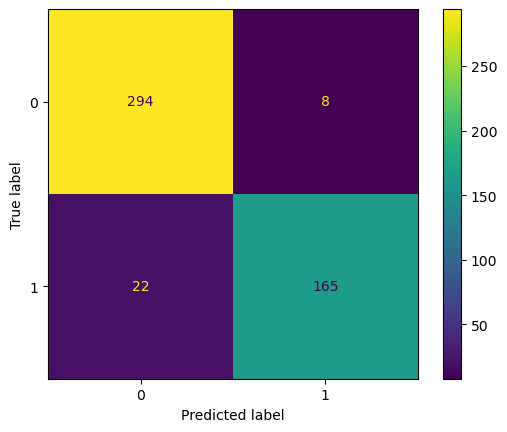

In [32]:
# Disply the matrix
ConfusionMatrixDisplay.from_estimator(knn, xtrain, ytrain)

In [33]:
# clssifiaction report
class_report = classification_report(ytrain, ypred)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       302
           1       0.95      0.88      0.92       187

    accuracy                           0.94       489
   macro avg       0.94      0.93      0.93       489
weighted avg       0.94      0.94      0.94       489



3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [42]:
FP,TN, TP, FN = confMt.ravel()

# compute rates
true_positive_rate = TP/(TP + FN)
false_positive_rate = FP/(FP + TN)
true_negative_rate = TN/(TN + FP)
false_negative_rate = FN/(FN + TP)

precision = TP/(TP + FP)
recall = TP/(TP + FN)
f1_score = 2*(precision*recall)/(precision+recall)

support_pos = TP + FN
support_neg = FP + TN

dict = {
    'metric' : ['accuracy'
                ,'true_positive_rate'
                ,'false_positive_rate'
                ,'true_negative_rate'
                ,'false_negative_rate'
                ,'precision'
                ,'recall'
                ,'f1_score'
                ,'support_pos'
                ,'support_neg']
    ,'score' : [accuracy
                ,true_positive_rate
                ,false_positive_rate
                ,true_negative_rate
                ,false_negative_rate
                ,precision
                ,recall
                ,f1_score
                ,support_pos
                ,support_neg]
}

pd.DataFrame(dict)

,metric,score
0,accuracy,0.938650
1,true_positive_rate,0.117647
2,false_positive_rate,0.973510
3,true_negative_rate,0.026490
4,false_negative_rate,0.882353
5,precision,0.069620
6,recall,0.117647
7,f1_score,0.087475
8,support_pos,187.000000
9,support_neg,302.000000


**4. Run through steps 1-3 setting k to 10**

In [52]:
def compute_knn(xtrain, ytrain, k):
    # get a knn object
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)

    # fit the model
    knn.fit(xtrain, ytrain) 
    
    # predict the target
    ypred = knn.predict(xtrain)

    # estimate probability
    ypred_proba = knn.predict_proba(xtrain)
    
    # accuracy score for knn
    knn_acc = knn.score(xtrain, ytrain)

    # confution matrix agaist the prediction
    comfusion_mtx = confusion_matrix(ytrain, ypred)

    class_report = classification_report(ytrain, ypred)

    return knn, xtrain, ytrain, ypred, ypred_proba, knn_acc, comfusion_mtx, class_report 

In [53]:
# umpack the knn computation function
knn, xtrain, ytrain, ypred, ypred_proba, knn_acc, comfusion_mtx, class_report  = compute_knn(xtrain, ytrain, 10)


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       302
           1       0.97      0.87      0.92       187

    accuracy                           0.94       489
   macro avg       0.95      0.92      0.93       489
weighted avg       0.94      0.94      0.94       489



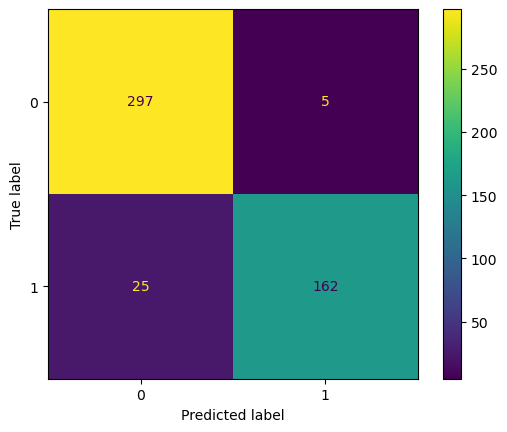

In [54]:
print(class_report)

ConfusionMatrixDisplay.from_estimator(knn, xtrain, ytrain)

**5. Run through steps 1-3 setting k to 20**

In [55]:
# umpack the knn computation function
knn, xtrain, ytrain, ypred, ypred_proba, knn_acc, comfusion_mtx, class_report  = compute_knn(xtrain, ytrain, 20)


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       302
           1       0.97      0.87      0.92       187

    accuracy                           0.94       489
   macro avg       0.95      0.92      0.93       489
weighted avg       0.94      0.94      0.94       489



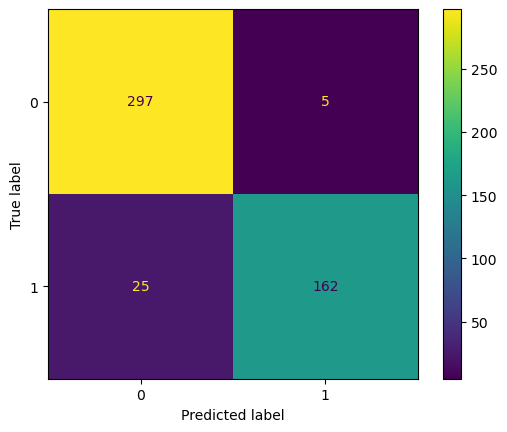

In [56]:
print(class_report)

ConfusionMatrixDisplay.from_estimator(knn, xtrain, ytrain)

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [66]:
# compute for my beseline accuracy score
train_baseline_acc_score = accuracy_score(train.survived,train.baseline)
val_baseline_acc_score = accuracy_score(validate.survived,validate.baseline)

train_baseline_acc_score, val_baseline_acc_score

(0.6175869120654397, 0.6143497757847534)

In [67]:
metrics = []

for k in range(1, 21):
    #MAKE the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #FIT the thing
    knn.fit(xtrain, ytrain)
    
    #USE the thing
    train_score= knn.score(xtrain, ytrain)
    validate_score = knn.score(xvalidate, yvalidate)
    
    # create a dictionary of scores
    output = {
        "k": k,
        "train_score": train_score,
        "validate_score": validate_score,
        "difference": train_score - validate_score,
        "train_baseline_diff": train_baseline_acc_score - train_score,
        "val_baseline_diff": val_baseline_acc_score - validate_score
    }
    
    metrics.append(output)

In [68]:
df = pd.DataFrame(metrics)
df.head()

,k,train_score,validate_score,difference,train_baseline_diff,val_baseline_diff
0,1,0.920245,0.721973,0.198272,-0.302658,-0.107623
1,2,0.836401,0.677130,0.159271,-0.218814,-0.062780
2,3,0.848671,0.762332,0.086339,-0.231084,-0.147982
3,4,0.820041,0.775785,0.044256,-0.202454,-0.161435
4,5,0.799591,0.748879,0.050712,-0.182004,-0.134529


7. Which model performs best on our out-of-sample data from validate?

In [71]:
# max values
pd.DataFrame(df.max())

,0
k,20.000000
train_score,0.920245
validate_score,0.775785
difference,0.198272
train_baseline_diff,-0.083845
val_baseline_diff,-0.062780


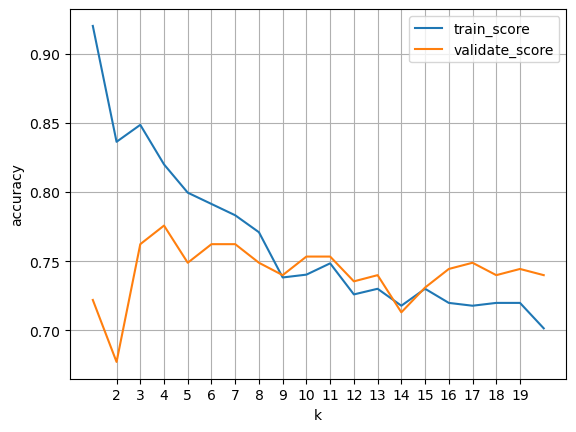

In [74]:
#PLOT the data
df[df.columns[:-3]].set_index("k").plot()
plt.ylabel('accuracy')
plt.xticks(np.arange(2,20))
plt.grid()
plt.show()

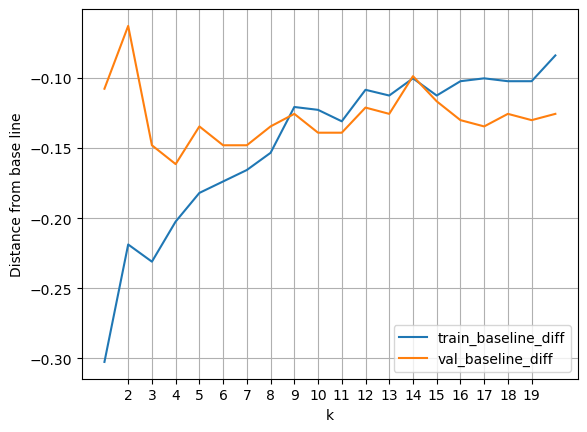

In [77]:
df.drop(columns=["difference","validate_score", "train_score"]).set_index("k").plot()
plt.ylabel('Distance from base line')
plt.xticks(np.arange(2,20))
plt.grid()
plt.show()

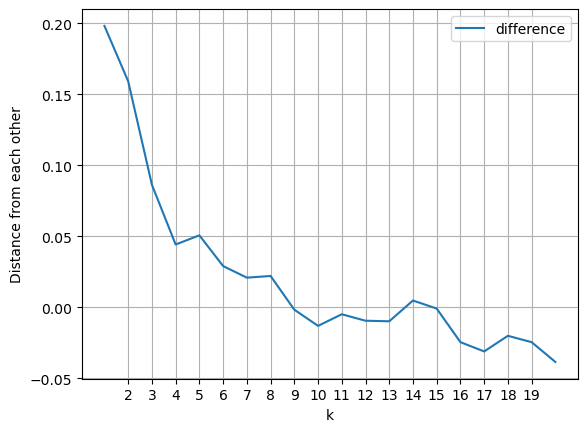

In [78]:
df[["difference", "k"]].set_index("k").plot()
plt.ylabel('Distance from each other')
plt.xticks(np.arange(2,20))
plt.grid()
plt.show()

Model 9 looks to be performing better in this case.